## K-Nearest Neighbour Classifier

In [2]:
## importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
## creating the dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000,
                           n_classes=2,
                           n_features=3,
                           n_redundant=1,
                           random_state=42)

In [4]:
## train, test, split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
## importing KNN
from sklearn.neighbors import KNeighborsClassifier

In [6]:
## making classifier object
classifier = KNeighborsClassifier(n_neighbors=6, algorithm="auto")

"""
Some important parameters -> p: p=2 -> euclidian distantce, p=1 -> manhattan distance
                            algorithm: auto, kd_tree, ball_tree, brute -> used to perform search on the Binary Tree.
                            weigths: uniform -> all points in the neighbour are weighted equally, 
                                     distance -> close neighbour - greater influence than farther neighbour. 
"""

## training the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [7]:
## making predictions
y_pred = classifier.predict(X_test)

In [8]:
## checking the performance of the classifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

c_matrix = confusion_matrix(y_pred, y_test)
accuracy = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)

print("Confusion Matrix:\n", c_matrix)
print("Accuracy:",accuracy)
print("classification Report:\n", report)

Confusion Matrix:
 [[115  13]
 [  7 115]]
Accuracy: 0.92
classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       128
           1       0.90      0.94      0.92       122

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



We can see that on k=6, we are getting accuracy of 92%.  
Now I am going to apply Grid Search Cross Validation for Hyperparametertuning.

#### Grid Search CV

In [9]:
## importing the required module from sklearn library
from sklearn.model_selection import GridSearchCV

In [10]:
## defining the parameters
params_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['kd_tree', "ball_tree", "brute"]
}

In [11]:
## making the grid object
grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=params_grid, cv=4)

In [13]:
## training the model
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'ball_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [14]:
## checking the best parameters
grid.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 7}

In [15]:
## making predictions
y_grid_predict = grid.predict(X_test)

In [16]:
## checking the performance of the model
c_matrix = confusion_matrix(y_grid_predict, y_test)
accuracy = accuracy_score(y_grid_predict, y_test)
report = classification_report(y_grid_predict, y_test)

print("Confusion Matrix:\n", c_matrix)
print("Accuracy:",accuracy)
print("classification Report:\n", report)

Confusion Matrix:
 [[114  11]
 [  8 117]]
Accuracy: 0.924
classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       125
           1       0.91      0.94      0.92       125

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



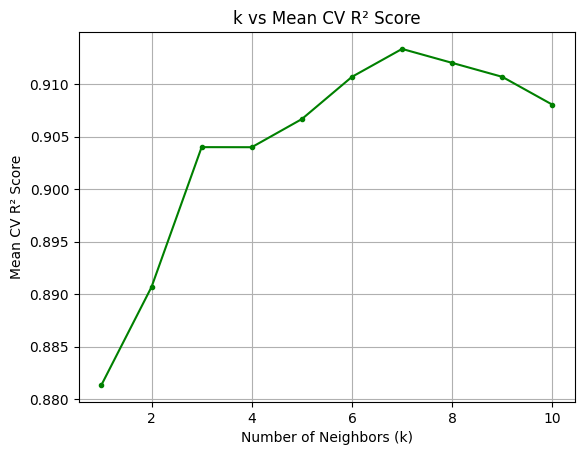

In [18]:
## Plotting k vs R2 score
import pandas as pd
import matplotlib.pyplot as plt

# Convert cv_results_ to DataFrame
results_df = pd.DataFrame(grid.cv_results_)

# Group by n_neighbors and compute mean R² score across all other parameters (algorithm etc.)
mean_scores = results_df.groupby('param_n_neighbors')['mean_test_score'].mean()

# Plot
mean_scores.plot(marker='.', color='green')
plt.title("k vs Mean CV R² Score")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean CV R² Score")
plt.grid(True)
plt.show()
